In [9]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# 1) Carga de tu dataset limpio
df = pd.read_csv('train_cleaned.csv')
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# 2) División en Train (60%), Val (20%), Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# 3) Define las configuraciones de los 3 modelos
configs = [
    {
        'name': 'Modelo A',
        'hidden_layers': (16,),
        'activation': 'relu',
        'solver': 'adam',
        'learning_rate_init': 0.001,
        'max_iter': 200,
        'batch_size': 32,
    },
    {
        'name': 'Modelo B',
        'hidden_layers': (32, 16),
        'activation': 'tanh',
        'solver': 'sgd',
        'learning_rate_init': 0.01,
        'max_iter': 300,
        'batch_size': 64,
    },
    {
        'name': 'Modelo C',
        'hidden_layers': (64, 32, 16),
        'activation': 'relu',
        'solver': 'adam',
        'learning_rate_init': 0.0005,
        'max_iter': 250,
        'batch_size': 16,
    },
]

results = []

for cfg in configs:
    # 4) Construye y entrena el MLP
    clf = MLPClassifier(
        hidden_layer_sizes=cfg['hidden_layers'],
        activation=cfg['activation'],
        solver=cfg['solver'],
        learning_rate_init=cfg['learning_rate_init'],
        max_iter=cfg['max_iter'],
        batch_size=cfg['batch_size'],
        random_state=42
    )
    start = time.time()
    clf.fit(X_train, y_train)
    elapsed = time.time() - start

    # 5) Evalúa en test
    y_pred = clf.predict(X_test)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    cm   = confusion_matrix(y_test, y_pred)

    results.append({
        'Modelo': cfg['name'],
        'Arquitectura': cfg['hidden_layers'],
        'Activación': cfg['activation'],
        'Optimizador': cfg['solver'],
        'LR Init': cfg['learning_rate_init'],
        'Épocas': cfg['max_iter'],
        'Batch': cfg['batch_size'],
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
        'Tiempo (s)': round(elapsed, 2),
        'Matriz Confusión': cm.tolist()
    })

# 6) Presenta los resultados en forma de tabla
import pandas as pd
tabla = pd.DataFrame(results).drop(columns=['Matriz Confusión'])
print(tabla.to_markdown(index=False))


c:\Users\gonza\OneDrive\Escritorio\Codigo\Facultad\mierda_jaquelin\integrador_si\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gonza\OneDrive\Escritorio\Codigo\Facultad\mierda_jaquelin\integrador_si\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


| Modelo   | Arquitectura   | Activación   | Optimizador   |   LR Init |   Épocas |   Batch |   Accuracy |   Precision |   Recall |   F1-Score |   Tiempo (s) |
|:---------|:---------------|:-------------|:--------------|----------:|---------:|--------:|-----------:|------------:|---------:|-----------:|-------------:|
| Modelo A | (16,)          | relu         | adam          |    0.001  |      200 |      32 |     0.7727 |      0.8191 |   0.7    |     0.7549 |         0.82 |
| Modelo B | (32, 16)       | tanh         | sgd           |    0.01   |      300 |      64 |     0.7818 |      0.7981 |   0.7545 |     0.7757 |         0.94 |
| Modelo C | (64, 32, 16)   | relu         | adam          |    0.0005 |      250 |      16 |     0.7955 |      0.8283 |   0.7455 |     0.7847 |         3.76 |


c:\Users\gonza\OneDrive\Escritorio\Codigo\Facultad\mierda_jaquelin\integrador_si\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


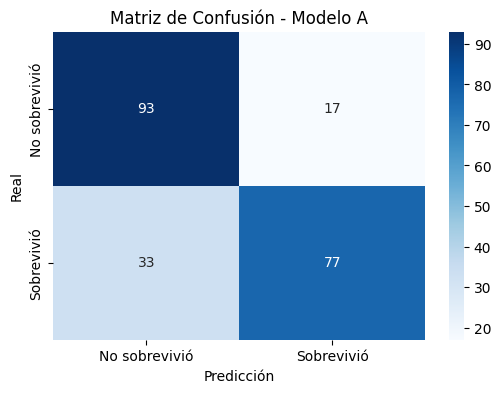

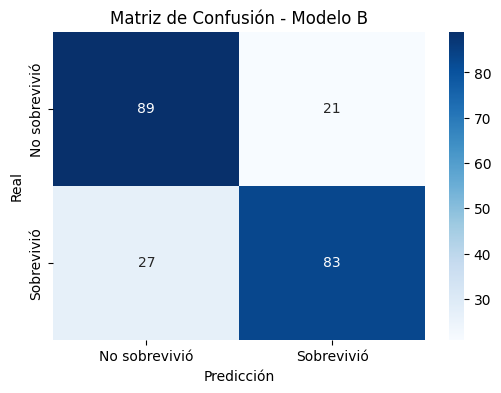

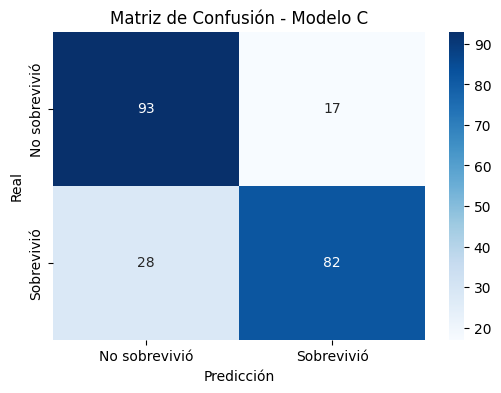

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

for r in results:
    cm = r['Matriz Confusión']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
    plt.title(f"Matriz de Confusión - {r['Modelo']}")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()